In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../../datasets/breast_cancer.csv")
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
raw_data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [4]:
raw_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df_corr = raw_data.copy()
df_corr["diagnosis_num"] = df_corr["diagnosis"].map({"M": 1, "B": 0})
corr_matrix = df_corr.drop(columns="diagnosis").corr(numeric_only=True)
corr_matrix["diagnosis_num"].sort_values(ascending=False)

diagnosis_num              1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

## From Scratch

In [6]:
X = raw_data[["concave points_worst", "perimeter_worst"]]
y = (raw_data["diagnosis"] == 'M').astype(int)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [16]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std
n_features = X_train_scaled.shape[1]
m = y_train.shape[0]

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def log_loss(y, y_prob):
    return (1 / m) * np.sum(-(y*np.log(y_prob) + (1 - y) * np.log(1 - y_prob)))

In [18]:
b = 0.0
w = np.zeros(n_features)

lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    z = b + X_train_scaled.dot(w) 
    y_prob = sigmoid(z)
    eps = 1e-15
    y_prob = np.clip(y_prob, eps, 1 - eps)
    loss = log_loss(y_train, y_prob)
    losses.append(loss)

    diff = y_prob - y_train
    dw = (1 / m) * X_train_scaled.T.dot(diff)
    db = (1 / m) * np.sum(diff)

    w -= lr * dw
    b -= lr * db

    if epoch % 50 == 0:
        print(f"{epoch} Iteration:")
        print(f"Log Loss: {loss:.2f}")


0 Iteration:
Log Loss: 0.69
50 Iteration:
Log Loss: 0.57
100 Iteration:
Log Loss: 0.49
150 Iteration:
Log Loss: 0.43
200 Iteration:
Log Loss: 0.39
250 Iteration:
Log Loss: 0.36
300 Iteration:
Log Loss: 0.34
350 Iteration:
Log Loss: 0.32
400 Iteration:
Log Loss: 0.30
450 Iteration:
Log Loss: 0.29
500 Iteration:
Log Loss: 0.28
550 Iteration:
Log Loss: 0.27
600 Iteration:
Log Loss: 0.26
650 Iteration:
Log Loss: 0.25
700 Iteration:
Log Loss: 0.24
750 Iteration:
Log Loss: 0.24
800 Iteration:
Log Loss: 0.23
850 Iteration:
Log Loss: 0.23
900 Iteration:
Log Loss: 0.22
950 Iteration:
Log Loss: 0.22


In [19]:
z_train = X_train_scaled.dot(w) + b
y_train_prob = sigmoid(z_train)
loss_train = log_loss(y_train, y_train_prob)
loss_train

np.float64(0.21598619015374876)

In [27]:
z_test = X_test_scaled.dot(w) + b
y_test_prob = sigmoid(z_test)
loss_test = log_loss(y_test, y_test_prob)
loss_test

np.float64(0.05132730188491465)

In [65]:
def predict(threshold):
    y_test_pred = (y_test_prob >= threshold).astype(int)
    return y_test_pred

In [66]:
def calculate_confusion(pred):
    TN = np.sum((pred == 0) & (y_test == 0))
    TP = np.sum((pred == 1) & (y_test == 1))
    FN = np.sum((pred == 0) & (y_test == 1))
    FP = np.sum((pred == 1) & (y_test == 0))
    return TN, TP, FN, FP

In [70]:
def get_eval_metrics(threshold=0.5):
    pred = predict(threshold)
    TN, TP, FN, FP = calculate_confusion(pred)
    accuracy = (TN + TP) / (TN + TP + FN + FP)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    return {
        "accuracy": f"{accuracy:.4f}",
        "precision": f"{precision:.4f}",
        "recall": f"{recall:.4f}",
        "f1_score": f"{f1_score:.4f}",
        "confusion_matrix": np.array([
            [TN, FP],
            [FN, TP]
        ])
    }

In [71]:
get_eval_metrics(0.5)

{'accuracy': '0.9649',
 'precision': '1.0000',
 'recall': '0.9048',
 'f1_score': '0.9500',
 'confusion_matrix': array([[72,  0],
        [ 4, 38]])}

In [72]:
get_eval_metrics(0.3)

{'accuracy': '0.9561',
 'precision': '0.8936',
 'recall': '1.0000',
 'f1_score': '0.9438',
 'confusion_matrix': array([[67,  5],
        [ 0, 42]])}

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc = roc_auc_score(y_test, y_test_prob)

print(f"ROC AUC: {auc:.4f}")

ROC AUC: 0.9957


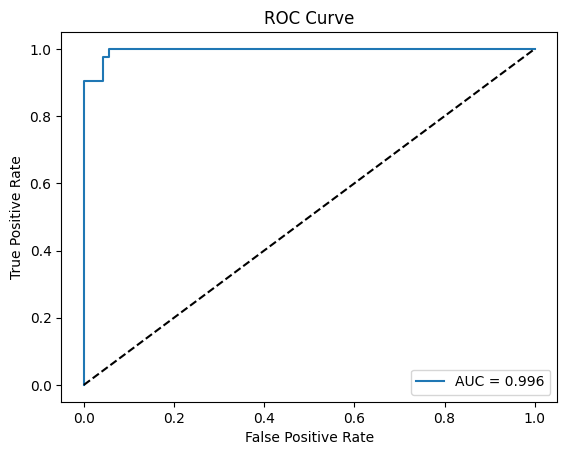

In [78]:
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

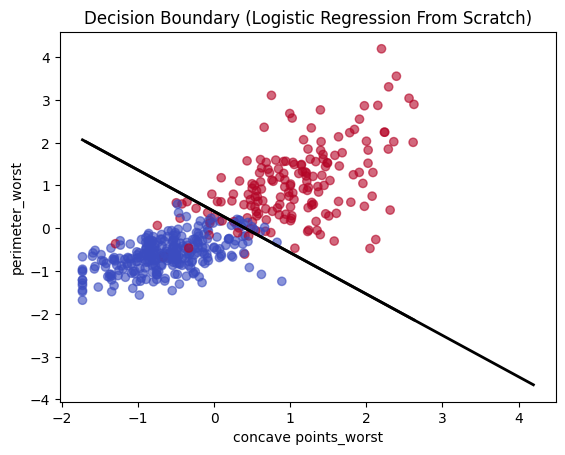

In [90]:
plt.scatter(
    X_train_scaled.iloc[:, 0],
    X_train_scaled.iloc[:, 1],
    c=y_train,
    cmap="coolwarm",
    alpha=0.6
)
x1_vals =np.linspace(
    X_train_scaled.min(),
    X_train_scaled.max(),
    100
)
w1, w2 = w
x2_vals = - (w1 * x1_vals + b) / w2

plt.plot(x1_vals, x2_vals, color="black", linewidth=2)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")
plt.title("Decision Boundary (Logistic Regression From Scratch)")
plt.show()

## With Sklearn